<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/Training_with_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the horse or human dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-10-11 22:14:22--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   223MB/s    in 0.6s    

2023-10-11 22:14:23 (223 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Unzip the downloaded dataset
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
# Define directories for the training data

import os

# Directory with the training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with the training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [4]:
# Let's explore the images in the directories
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:5])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:5])

['horse31-7.png', 'horse27-5.png', 'horse08-4.png', 'horse31-4.png', 'horse24-9.png']
['human06-04.png', 'human12-10.png', 'human08-04.png', 'human04-12.png', 'human02-27.png']


In [5]:
# The total number of images in the directories
len(os.listdir(train_horse_dir)), len(os.listdir(train_human_dir))


(500, 527)

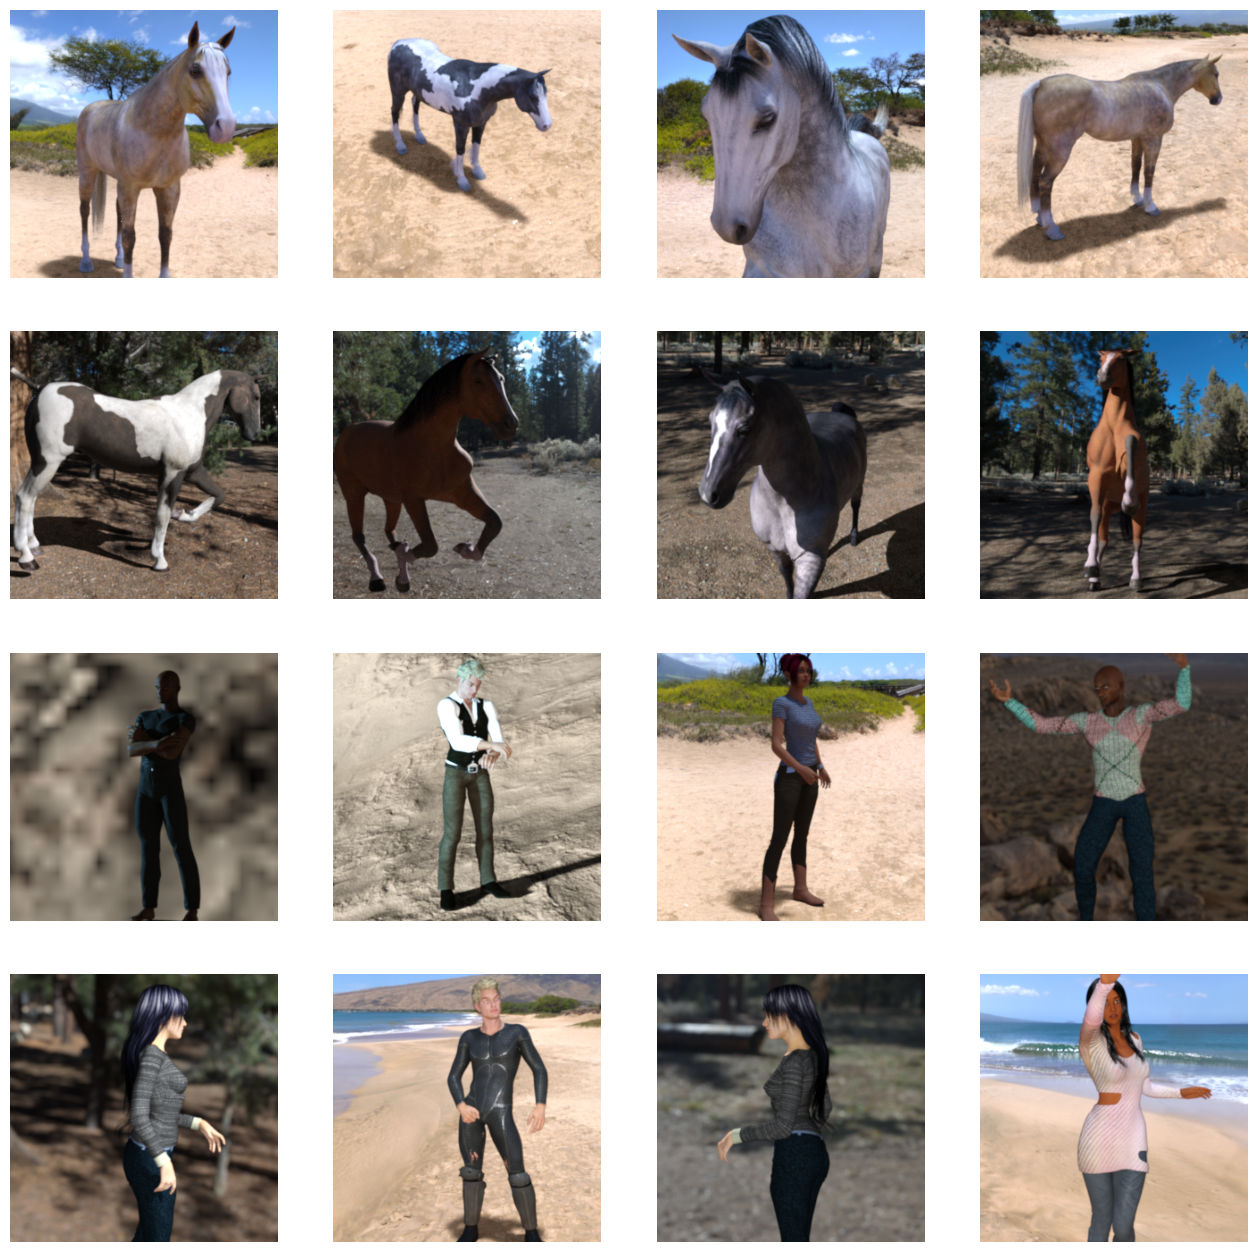

In [6]:
# Let's see what the pictures look like
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph
nrows = 4
ncols = 4

# Index for iterating over the images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [7]:
# Building the model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [9]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss= 'binary_crossentropy', metrics=['accuracy'])

In [10]:
# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resccale or images
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow images in batches of 128 using train_datagen
train_generator = train_datagen.flow_from_directory(
    './horse-or-human', target_size=(300, 300),
    batch_size=128, class_mode='binary')

Found 1027 images belonging to 2 classes.


In [11]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=8, epochs=15)

Epoch 1/15
8/8 [==============================] - 20s 617ms/step - loss: 0.7791 - accuracy: 0.5184
Epoch 2/15
8/8 [==============================] - 7s 852ms/step - loss: 0.6598 - accuracy: 0.6162
Epoch 3/15
8/8 [==============================] - 7s 858ms/step - loss: 0.8198 - accuracy: 0.6552
Epoch 4/15
8/8 [==============================] - 7s 827ms/step - loss: 0.5578 - accuracy: 0.7620
Epoch 5/15
8/8 [==============================] - 6s 759ms/step - loss: 0.4289 - accuracy: 0.8098
Epoch 6/15
8/8 [==============================] - 7s 996ms/step - loss: 0.1989 - accuracy: 0.9210
Epoch 7/15
8/8 [==============================] - 8s 857ms/step - loss: 0.0994 - accuracy: 0.9633
Epoch 8/15
8/8 [==============================] - 6s 772ms/step - loss: 3.4074 - accuracy: 0.8443
Epoch 9/15
8/8 [==============================] - 7s 765ms/step - loss: 0.2041 - accuracy: 0.9488
Epoch 10/15
8/8 [==============================] - 7s 853ms/step - loss: 0.0658 - accuracy: 0.9844
Epoch 11/15
8/8 [=

In [12]:
## Prediction
## Upload a file of horse or human

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving horse-img.jpg to horse-img.jpg
1/1 [==============================] - 0s 348ms/step
[0.0043322]
horse-img.jpg is a horse
